In [1]:
import torch
import numpy as np 

In [2]:
print(torch.backends.mps.is_available())

True


Three components of PyTorch

1.tensor library 

2.Automatic differentiation engine 

3.Deep Learning Library

In [3]:
#Creating a tensor 

In [4]:
'''
what is tensors in pyTorch?
Tensors represent a mathematical concept that generalizes vectors and matrices to potentially higher dimension
'''
tensor_0d = torch.tensor(1) #scalar 
tensor_1d = torch.tensor([1,2,3]) #vector
tensor_2d = torch.tensor([[1,2,3],[3,4,3]]) # matrix
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]]) #D


In [5]:
np.set_printoptions(precision=3)
a = [1,2,3]
b = np.array([4,5,6],dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.tensor(b)

In [6]:
print(t_a.shape,t_b.shape)

torch.Size([3]) torch.Size([3])


In [7]:
rand_tensor = torch.rand([3,3])
rand_tensor

tensor([[0.1501, 0.1943, 0.8919],
        [0.4980, 0.3842, 0.7103],
        [0.0328, 0.4907, 0.9518]])

Manipulating the data type and shape of a tensor 

In [8]:
t = torch.rand([3,5])

In [9]:
t_tr = torch.transpose(t,dim0=1,dim1=0)
print(t.shape,t_tr.shape)

torch.Size([3, 5]) torch.Size([5, 3])


In [10]:
#reshaping the tensor(for example 1d to 2d)

In [11]:
t = torch.zeros(30)
t

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])

In [12]:
t.reshape(5,6)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [13]:
#squeezing out the unnecessary dimension(dimenstion that have size 1)

In [14]:
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t,2)

In [15]:
t_sqz.shape

torch.Size([1, 2, 4, 1])

In [16]:
#mathematical operations to tensor 

In [17]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) -1 

t2 = torch.normal(mean=0,std=1,size=(5,2))

In [18]:
t2

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])

In [19]:
t3 = torch.multiply(t1,t2)
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [20]:
t4 = torch.mean(t3,dim=0)

In [21]:
t4

tensor([ 0.3491, -0.0436])

In [22]:
t2_tr = t2.T

In [23]:
t5 = torch.matmul(t1,t2_tr)
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [24]:
norm_l1 = torch.linalg.norm(t1,ord=2,dim=1)
print(norm_l1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [25]:
#split, stack and concanetate tensors 

In [26]:
torch.manual_seed(1)
t= torch.rand(6)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [27]:
t_splits = torch.chunk(t,3)

In [28]:
[item.numpy() for item in t_splits]

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [29]:
#Providing the size of different split 
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_split = torch.split(t,split_size_or_sections=[3,2])
[item.numpy() for item  in t_split]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

Concanitating the tensor 

In [30]:
a = torch.ones(3)
b = torch.ones(2)
c = torch.cat([a,b],axis = 0 )
c

tensor([1., 1., 1., 1., 1.])

In [31]:
a = torch.ones(3)
b = torch.ones(3)
c = torch.stack([a,b],axis = 1)
c

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Building input pipelines in PyTorch 

In [32]:
import torch    

In [33]:
from torch.utils.data import DataLoader,Dataset
t = torch.arange(6,dtype=torch.float32)
data_loader = DataLoader(t,batch_size=3)
for i,batch in enumerate(data_loader):
    print(f'batch {i} {batch}')

batch 0 tensor([0., 1., 2.])
batch 1 tensor([3., 4., 5.])


Dataset Class 

In [34]:
class JointDataset(Dataset):
    def __init__(self,x,y):
        self.x = x 
        self.y = y 
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index],self.y[index]

In [35]:
torch.manual_seed(1 )
t_x = torch.rand([4,3])
t_y = torch.arange(4)

In [36]:
joint_dataset = JointDataset(t_x,t_y)

In [37]:
t_x

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])

In [38]:
for example in joint_dataset:
    print('x: ',example[0],'y:',example[1])


x:  tensor([0.7576, 0.2793, 0.4031]) y: tensor(0)
x:  tensor([0.7347, 0.0293, 0.7999]) y: tensor(1)
x:  tensor([0.3971, 0.7544, 0.5695]) y: tensor(2)
x:  tensor([0.4388, 0.6387, 0.5247]) y: tensor(3)


In [39]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset,shuffle=True,drop_last=True)
for i,batch in enumerate(data_loader,1):
    print(f'batch{i}: {batch[0],{batch[1]}}')

batch1: (tensor([[0.3971, 0.7544, 0.5695]]), {tensor([2])})
batch2: (tensor([[0.7576, 0.2793, 0.4031]]), {tensor([0])})
batch3: (tensor([[0.7347, 0.0293, 0.7999]]), {tensor([1])})
batch4: (tensor([[0.4388, 0.6387, 0.5247]]), {tensor([3])})


In [40]:
dataloader = DataLoader(dataset=joint_dataset,shuffle=True,drop_last=True)
for i,batch in enumerate(dataloader,1):
    print(f'batch{i}: {batch[0],{batch[1]}}')

batch1: (tensor([[0.7576, 0.2793, 0.4031]]), {tensor([0])})
batch2: (tensor([[0.3971, 0.7544, 0.5695]]), {tensor([2])})
batch3: (tensor([[0.7347, 0.0293, 0.7999]]), {tensor([1])})
batch4: (tensor([[0.4388, 0.6387, 0.5247]]), {tensor([3])})


In [41]:
import pathlib
img_dir_path = pathlib.Path('/Users/ripeshghimire/coding/ResearchPaper/cat_dog')

In [42]:
file_list = sorted([str(path) for path in img_dir_path.glob('*.jpg')])

In [43]:
len(file_list)

25000

Image shape: (374, 500, 3)
Image shape: (280, 300, 3)
Image shape: (499, 489, 3)
Image shape: (499, 403, 3)
Image shape: (149, 150, 3)
Image shape: (359, 431, 3)


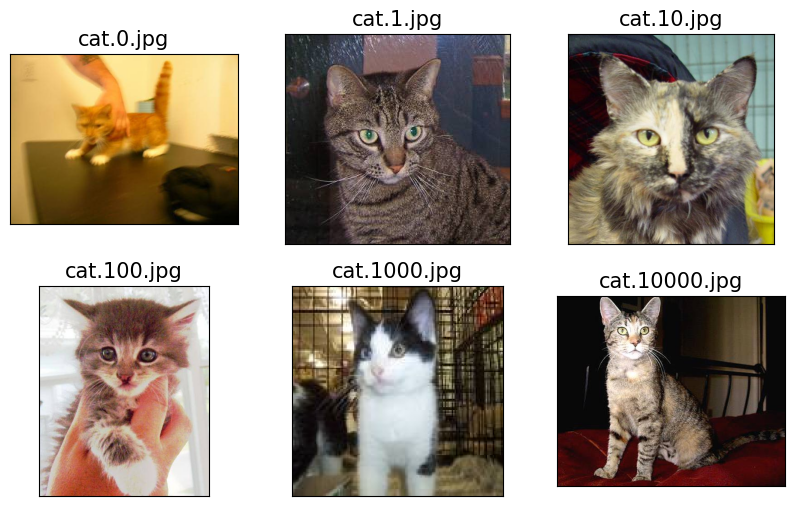

In [44]:
import matplotlib.pyplot as plt 
import os 
import numpy as np 
from PIL import Image
fig = plt.figure(figsize=(10,6))
for i,file in enumerate(file_list[:6]):
    img = Image.open(file)
    print("Image shape:",np.array(img).shape)
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file),size=15)


In [45]:
labels = [1 if "dog" in os.path.basename(file) else 0 for file in file_list]

In [46]:
from torch.utils.data import DataLoader,Dataset
class ImageDataset(Dataset):
    def __init__(self,file_list,labels):
        self.file_list = file_list
        self.labels = labels
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file,label
    def __len__(self):
        return len(self.labels)

        

In [47]:
import torchvision.transforms as transforms
img_height,img_width = 80,120
transform  = transforms.Compose([transforms.ToTensor(),
                                 transforms.Resize((img_height,img_width))
                                 ])


In [48]:
class ImageDataset(Dataset):
    def __init__(self,file_list,labels,transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform  
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img,label
    def __len__(self):
        return len(self.labels)

    

In [49]:
image_dataset = ImageDataset(file_list,labels)

In [50]:
print(image_dataset)

In [51]:
image_dataset[0]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>, 0)

Torch.nn Neural Network 


module developed and created to train NNs


Allows easy prototyping and the building of complex models in just a few lines of code 


most commonly used approach for building an NN in PyTorch is throug nn.Module,which allows layers to be stacked to form 
a network . This gives more control over the forward pass. 

In [52]:
import torch.nn as nn 
X_train = np.arange(10,dtype='float32').reshape(10,1)
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')



In [ ]:
class ImageDataset:
    def __init__(self,labels,file_list,transform=None):
        self.labels = labels
        self.file_list = file_list
        self.transform = transform
    def __getitem__(self,index):
        img = Image.open(self.file_list[index])
        if self.transform is not None :
            img = self.transform(img)
        label = self.labels[index]
        return img,label
    def __len__(self):
        return len(self.labels)


In [58]:
dataset = ImageDataset(t_x,t_y)